
<a id='chap-tpkmeans'></a>

# Assignment 3: K-means

The **objective** of this assignment is to present the use of scikit-learn functionalities concerning automatic classification with k-means, as well as to contribute to a better understanding of this method and the impact on the results of the data distribution or initialization technique (random initialization or k-means++). For this, data generated in a controlled manner are first examined and then real data seen in progress, with or without pre-processing to reinforce the separation between groups.

In [1]:
import numpy as np    
from sklearn.utils import shuffle

# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# generation of labels for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the data matrix
data, labels = shuffle(data, labels)

(500, 3)


Visualize the starting groups:

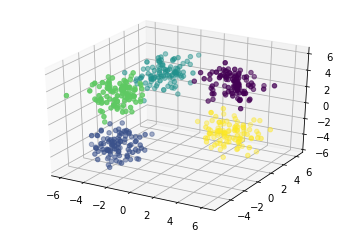

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# The color of the points depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Apply automatic classification with K-means, first with a single trial (a single initialization followed by a single execution of *K-means*, n_init=1) using the k-means++ initialization method:

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Review the parameters, attributes, and methods of the sklearn.cluster.KMeans class by following the link given above. The predicted groups for the data can be obtained using the predict(X) method:

In [40]:
pred = kmeans.predict(data)

Groups associated with training examples are also stored in the kmeans.labels_ attribute:

In [41]:
print(kmeans.labels_)

[3 4 0 3 0 4 1 2 4 2 2 2 1 4 0 4 2 1 3 1 4 1 1 0 1 1 4 1 4 1 0 4 1 3 3 4 3
 4 2 4 3 1 2 1 1 1 1 4 0 1 2 3 0 0 4 4 2 4 1 0 1 3 2 4 0 2 2 2 0 4 3 0 3 4
 3 4 3 1 2 1 0 3 1 0 3 1 0 0 3 2 4 4 2 4 0 4 2 4 3 1 2 4 0 2 3 0 0 3 2 4 4
 3 1 3 2 3 2 0 0 3 3 4 3 3 0 2 0 3 0 4 4 0 1 2 0 4 1 0 2 1 4 0 2 1 2 2 4 2
 3 1 3 2 3 2 2 3 3 2 0 2 2 1 1 2 1 1 0 4 0 4 4 4 3 4 2 4 2 1 1 3 3 0 1 4 4
 3 3 4 2 1 1 3 3 2 0 1 4 3 0 4 1 1 3 0 2 0 0 3 0 1 3 1 3 0 1 1 2 2 4 1 4 4
 2 0 1 2 0 0 0 0 1 0 0 2 2 0 1 0 1 3 2 4 2 0 1 4 0 2 2 3 0 2 3 2 0 1 3 0 4
 0 3 3 0 0 3 4 1 0 2 1 3 0 1 3 2 4 4 0 1 4 4 0 0 0 2 2 3 2 2 4 0 0 3 4 1 1
 3 4 1 2 3 1 0 2 4 3 4 1 2 4 3 1 1 3 3 3 0 2 2 1 2 1 1 4 3 3 2 3 4 4 4 3 4
 4 4 1 2 1 1 3 2 3 3 1 2 0 2 4 2 1 2 2 0 2 3 2 3 2 1 0 1 0 0 0 4 4 4 1 1 4
 3 0 1 4 0 2 0 2 0 3 4 1 0 0 3 0 3 4 4 1 0 3 3 0 0 1 0 2 4 3 4 3 3 4 2 3 2
 2 3 4 1 1 3 3 0 0 3 1 1 0 0 0 1 2 1 4 2 4 4 3 2 2 2 4 1 0 1 1 0 2 0 4 4 3
 4 2 2 2 2 0 2 2 1 3 2 3 3 0 1 0 1 4 1 3 2 2 1 3 3 0 4 3 4 4 3 2 1 4 3 2 3
 1 4 1 1 3 1 4 3 1 3 0 0 

Visualize the results of this classification:

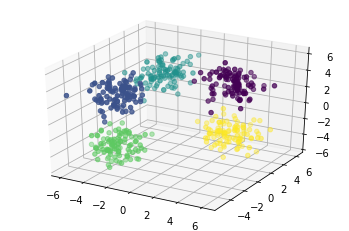

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

It is possible to assess the consistency between the starting groups and the partitioning found by K-means using the adjusted Rand index:

**Question 1: Repeat the classification several times with each of these two initialization 
methods and each time examine the consistency of the groups obtained with the starting 
groups. What do you notice? Explain.**


In [79]:
#init='k-means++'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9949848742198414

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9949848742198414

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.6796783494959999

**automatic classification using the random initialization method:**

In [97]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.7016941400291645

In [98]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.9949848742198414

In [103]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.6974807962667957

In [101]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.7034818195286973

In [105]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.6906663273817407

In [224]:
kmeans = KMeans(n_clusters=5,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

In [225]:
kmeans = KMeans(n_clusters=5,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338


q1: **As ca be seen in two method "kmeans++" and "random" by each initialization methods adjusted_rand_score has changed. But if we use random_state=1234 it will be constant.**

**Question 2: Vary the number of clusters (n_clusters) and experiment for each value** 
 **of the number of clusters. Re-examine the stability of the results using the adjusted Rand 
index. Explain what you see.**


In [260]:
kmeans = KMeans(n_clusters=5,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

In [262]:
kmeans = KMeans(n_clusters=6, random_state=1234,n_init=4, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.9306582735184784

In [248]:
kmeans = KMeans(n_clusters=10,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.7240102141945434

In [195]:
kmeans = KMeans(n_clusters=13,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.5357020147118692

In [202]:
kmeans = KMeans(n_clusters=16,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
metrics.adjusted_rand_score(pred, labels)

0.44565979046674986

Q2: **by increasing the the number of cluster adjusted_rand_score has decresed.**

**Question 3: Vary the number of groups (n_clusters) between 2 and 20, plot the 
evolution graph of the final value reached by the cost (inertia, see documentation) for 
each of the values of n_clusters.**

Text(0, 0.5, 'inertia')

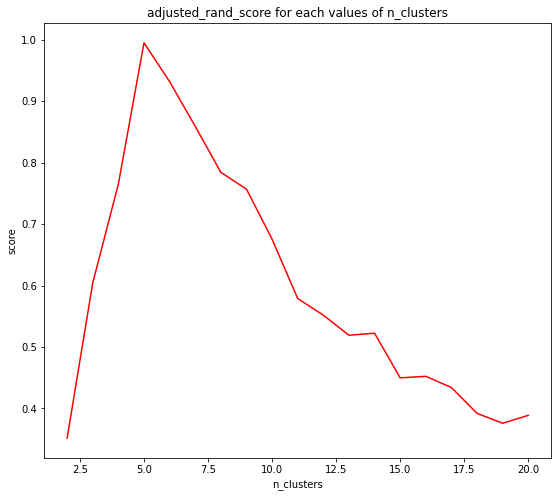

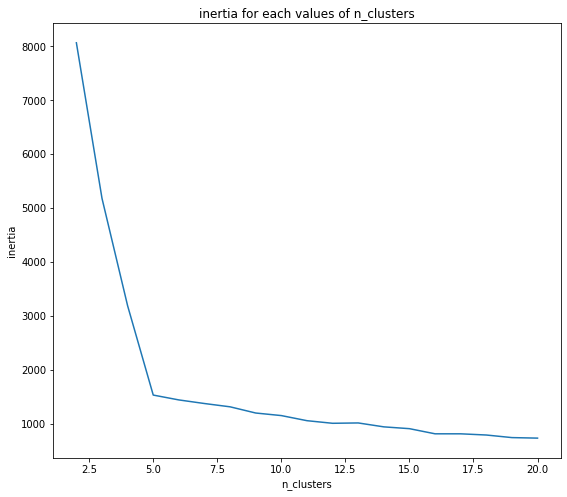

In [275]:
l=[metrics.adjusted_rand_score(KMeans(n_clusters=n, n_init=1, init='k-means++').fit(data).labels_, labels) for n in range(2,21)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(2,21), l,c='red')
plt.title("adjusted_rand_score for each values of n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("score")

I=[KMeans(n_clusters=n, n_init=1, init='k-means++').fit(data).inertia_ for n in range(2,21)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(122)
plt.plot(range(2,21),I)
plt.title("inertia for each values of n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("inertia")

**Question 4:**

In [300]:
u=r=np.random.uniform(0,1,(500,3))

In [303]:
kmeans = KMeans(n_clusters=5,random_state=1234, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)
KMeans1=KMeans(n_clusters=5,random_state=1234, n_init=1, init='random').fit(u)
metrics.adjusted_rand_score(KMeans1.labels_, pred)

0.0004007453368333727

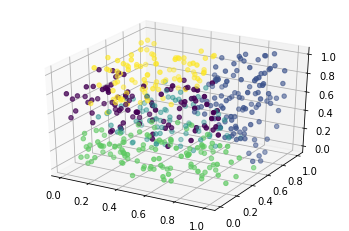

In [306]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=KMeans1.labels_)
plt.show()

In [307]:
KMeans1=KMeans(n_clusters=5,random_state=1234, n_init=1, init='k-means++').fit(u)
metrics.adjusted_rand_score(KMeans1.labels_, pred)

0.0013202822362007075

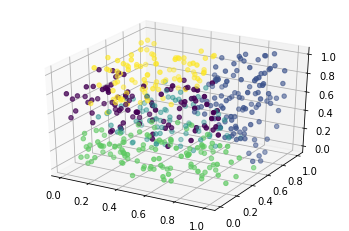

In [308]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=KMeans1.labels_)
plt.show()

**Question 5: Apply discriminant analysis to this data and again apply K-means with 
n_clusters = 11 to the projected data in the discriminant space. What do you notice? 
Explain. Visualize the results.**

In [315]:
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
kmeans = KMeans(n_clusters=11).fit(textures[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

0.4657159032203

In [337]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)
X_lda = lda.fit_transform(textures[:,:40],textures[:,40])
kmeans2 = KMeans(n_clusters=11).fit(X_lda)
metrics.adjusted_rand_score(kmeans2.labels_, textures[:,40])

0.755838684054155

In [335]:
len(textures[:,40])

5500

In [326]:
X_lda.shape

(5500, 3)

In [334]:
len(KMeans1.labels_)

500

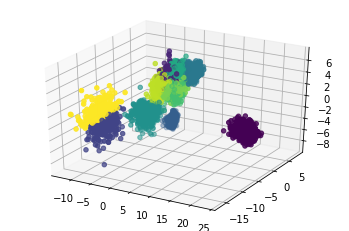

In [338]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lda[:,0], X_lda[:,1], X_lda[:,2], c=kmeans2.labels_)
plt.show()